<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter6/KernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 6.18
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import pi
from numpy.linalg import norm, inv, eigh
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(1357)

## Generate events

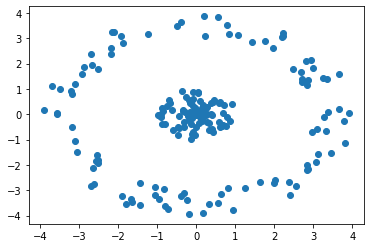

In [4]:
n  = 200
theta = np.random.uniform(0, 2*pi, n)
r = np.concatenate((np.random.uniform(0, 1.0, int(n/2)),np.random.uniform(3.0, 4.0, int(n/2))))
#np.random.shuffle(r)

x = np.zeros((2,n))
x[0] = r * np.cos(theta)
x[1] = r * np.sin(theta)
plt.scatter(x[0], x[1])
plt.show()

In [24]:
def k(u1,u2):
    return(np.exp(-0.5*norm(u1-u2)**2))

K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = k(x.T[i],x.T[j])

H = np.identity(n) - 1.0/n * np.ones(n) @ np.ones(n).T
XXT = H @ K @ H
eValue, eVector = eigh(XXT)
idx = eValue.argsort()[::-1]   
eValue = eValue[idx]
eVector = eVector[:,idx]
print(eValue)

m=9

'''
L = np.zeros((m,m))
np.fill_diagonal(L, np.sqrt(evalue[0:m]))
X_pc = np.column_stack(evector[0:m])
print(X_pc.shape)
print(x.shape)
print(evalue)
#z = X_pc.T @ x.T

z = np.sqrt(inv(L)) @ X_pc.T[0:9] @ K
#z = U.T[:][0:m] @ x
print(z[0])
plt.scatter(z[0][0:100], z[1][0:100])
plt.scatter(z[0][100:], z[1][100:])
print(z.shape)
plt.show()
'''

[ 1.70595603e+06  2.02186683e+01  1.25394587e+01  1.09624585e+01
  1.00224056e+01  9.65902114e+00  9.56014023e+00  7.96488767e+00
  7.42758312e+00  6.67434172e+00  5.83943234e+00  5.01548181e+00
  3.86049461e+00  3.10117066e+00  2.63917934e+00  1.90082520e+00
  1.73916488e+00  1.48124550e+00  1.40979263e+00  1.35723172e+00
  1.20440651e+00  1.11137189e+00  9.53136623e-01  7.78545308e-01
  7.09926791e-01  6.36764225e-01  5.75727992e-01  5.63674308e-01
  4.46904706e-01  4.25127219e-01  3.23749901e-01  2.85556905e-01
  2.49704404e-01  2.34032044e-01  1.79787548e-01  1.67495264e-01
  1.56848336e-01  1.32438898e-01  1.19301860e-01  9.37491650e-02
  8.78714450e-02  7.85477997e-02  7.47358724e-02  6.88039463e-02
  6.06923517e-02  5.33398414e-02  3.54565493e-02  3.18905721e-02
  2.49748388e-02  2.17897852e-02  2.07515048e-02  1.86539001e-02
  1.70984517e-02  1.58349175e-02  1.29253429e-02  1.23011320e-02
  1.07748723e-02  1.06327402e-02  8.45197477e-03  8.39729574e-03
  6.97662408e-03  5.09945

'\nm=9\nL = np.zeros((m,m))\nnp.fill_diagonal(L, np.sqrt(evalue[0:m]))\nX_pc = np.column_stack(evector[0:m])\nprint(X_pc.shape)\nprint(x.shape)\nprint(evalue)\n#z = X_pc.T @ x.T\n\nz = np.sqrt(inv(L)) @ X_pc.T[0:9] @ K\n#z = U.T[:][0:m] @ x\nprint(z[0])\nplt.scatter(z[0][0:100], z[1][0:100])\nplt.scatter(z[0][100:], z[1][100:])\nprint(z.shape)\nplt.show()\n'